In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("heart_disease_dataset.csv")

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [4]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')

In [5]:
df.shape

(400, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1), int64(13)
m

<Axes: xlabel='heart_disease'>

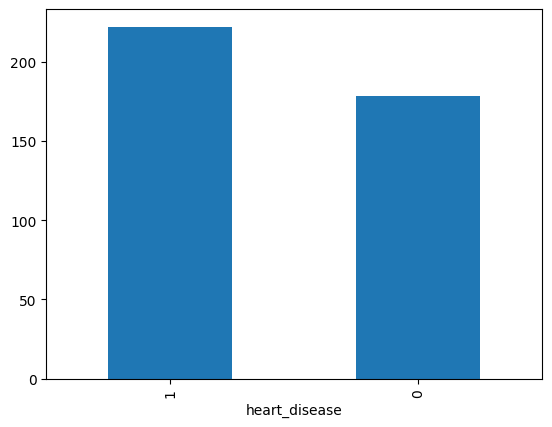

In [7]:
df['heart_disease'].value_counts().plot(kind = "bar")

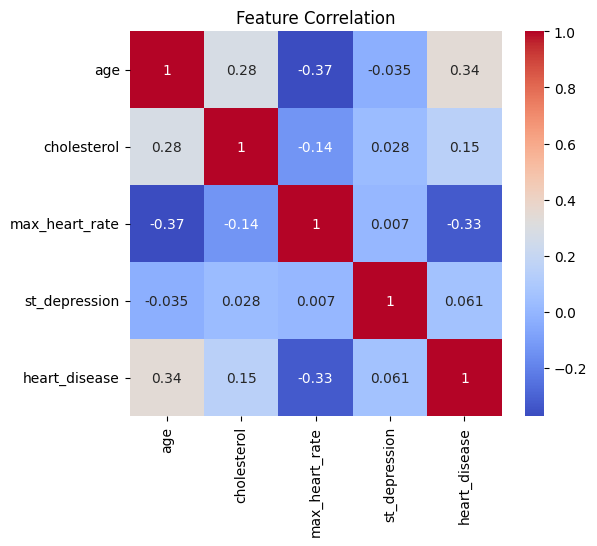

In [8]:
plt.figure(figsize=(6,5))
corr = df[["age", "cholesterol", "max_heart_rate", "st_depression", "heart_disease"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

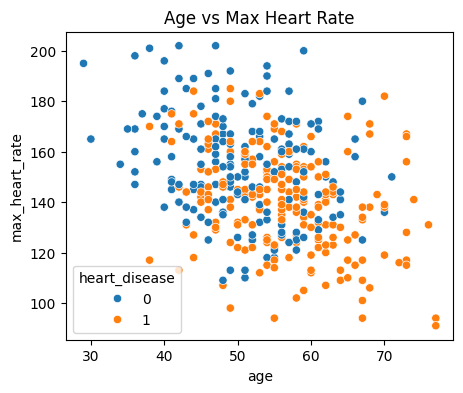

In [9]:
plt.figure(figsize=(5,4))
sns.scatterplot(
    x="age",
    y="max_heart_rate",
    hue="heart_disease",
    data=df
)
plt.title("Age vs Max Heart Rate")
plt.show()

In [10]:
df_encoded =pd.get_dummies(df,drop_first = True)

In [11]:
df_encoded

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49,1,1,133,178,0,1,164,0,2.5,1,0,3,1
396,38,1,3,111,126,1,1,170,0,0.7,1,0,2,1
397,66,1,1,136,205,0,1,127,1,1.0,1,0,2,1
398,52,1,3,144,208,1,1,131,0,0.3,1,0,0,1


In [12]:
df_encoded= df_encoded.astype(int)

In [13]:
df_encoded.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0,1,1,2,1


In [14]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['age', 'resting_blood_pressure', 'cholesterol','max_heart_rate', 'st_depression']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()
                
                

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,0.509840,1,1,0.626723,0.710714,0,0,0.392947,0,-0.495909,1,1,2,1
1,-0.196228,0,2,-0.702872,0.686517,0,0,-0.176370,1,-0.495909,0,0,3,1
2,0.627518,0,2,0.143234,-0.499115,0,0,0.725049,1,0.891250,1,0,1,1
3,1.568943,1,1,2.500243,-0.378132,0,0,1.579024,0,-0.495909,2,0,2,0
4,-0.313906,1,0,1.351956,-1.031439,1,1,-0.650800,1,-0.495909,1,1,2,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
X= df_encoded.drop('heart_disease',axis = 1)
y = df_encoded['heart_disease']



In [17]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "SVM": SVC(probability=True)
}

In [20]:
result = []

In [21]:
trained_models = {}

for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    trained_models[name] = model
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    result.append({
    'model': name,
    'Accuracy': round(acc, 4),
    'F1 Score': round(f1, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'ROC-AUC': round(auc, 4)
})


In [22]:
results_df = pd.DataFrame(result)
results_df = results_df.sort_values(
    by=['ROC-AUC', 'F1 Score'],
    ascending=[False, False]
).reset_index(drop=True)


In [23]:
results_df


,model,Accuracy,F1 Score,Precision,Recall,ROC-AUC
0,Naive Bayes,0.6750,0.6905,0.7632,0.6304,0.7244
1,Logistic Regression,0.7125,0.7294,0.7949,0.6739,0.7148
2,SVM,0.6625,0.7097,0.7021,0.7174,0.7059
3,KNN,0.6500,0.6957,0.6957,0.6957,0.6822
4,Random Forest,0.6250,0.6739,0.6739,0.6739,0.6410
5,Decision Tree,0.5625,0.6392,0.6078,0.6739,0.5428


In [24]:
# ================================================
# SAVE MODEL + SCALER FOR FASTAPI (Run this last)
# ================================================

import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Save the 4 models required by your project (with clean filenames)
joblib.dump(trained_models['Logistic Regression'], 'logistic_regression_model.joblib')
joblib.dump(trained_models['Decision Tree'],      'decision_tree_model.joblib')
joblib.dump(trained_models['Random Forest'],      'random_forest_model.joblib')
joblib.dump(trained_models['SVM'],                'svm_model.joblib')

print("✅ All models and scaler saved successfully!")
print("Files created:")
print("   • scaler.joblib")
print("   • logistic_regression_model.joblib")
print("   • decision_tree_model.joblib")
print("   • random_forest_model.joblib")
print("   • svm_model.joblib")

✅ All models and scaler saved successfully!
Files created:
   • scaler.joblib
   • logistic_regression_model.joblib
   • decision_tree_model.joblib
   • random_forest_model.joblib
   • svm_model.joblib
